In [1]:
%matplotlib inline
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import scale
import pandas
import matplotlib.pyplot as plt

data = pandas.read_csv('wine.csv')
data

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


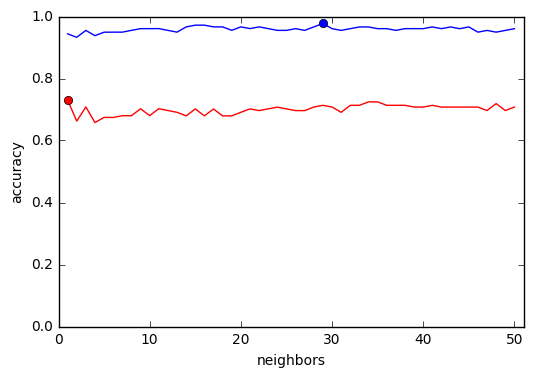

k_max without scaling = <1>
max score without scaling = <0.73>
k_max with scaling = <29>
max score with scaling = <0.98>


In [2]:
X = data.as_matrix()
y = X[:, 0]
X = np.delete(X, [0], axis=1)

kf = KFold(len(X), n_folds=5, shuffle=True, random_state=42)

accuracy = []
for n_neigh in range(1, 51):    
    neigh = KNeighborsClassifier(n_neighbors=n_neigh)
    accuracy.append(np.mean(cross_val_score(estimator=neigh, X=X, y=y, cv=kf)))

accuracy_scaled = []
for n_neigh in range(1, 51):    
    neigh = KNeighborsClassifier(n_neighbors=n_neigh)
    accuracy_scaled.append(np.mean(cross_val_score(estimator=neigh, X=scale(X), y=y, cv=kf)))

x = range(1,51)
plt.plot(x, accuracy, 'r')
plt.plot(x, accuracy_scaled, 'b')
plt.plot(np.argmax(accuracy) + 1, np.amax(accuracy), 'ro')
plt.plot(np.argmax(accuracy_scaled) + 1, np.amax(accuracy_scaled), 'bo')
plt.ylabel('accuracy')
plt.xlabel('neighbors')
plt.axis([0, 51, 0, 1])
plt.show()
print 'k_max without scaling = <{}>'.format(np.argmax(accuracy) + 1)
print 'max score without scaling = <{}>'.format(round(np.amax(accuracy), 2))
print 'k_max with scaling = <{}>'.format(np.argmax(accuracy_scaled) + 1)
print 'max score with scaling = <{}>'.format(round(np.amax(accuracy_scaled), 2))